In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import joblib

In [3]:
df=pd.read_csv('cardio_train.csv', sep=';')

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
#splitting the data into features and target 
X = df.drop(['cardio','id'], axis=1)
y = df['cardio']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
print(type(X_train), type(y_train), type(X_test), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


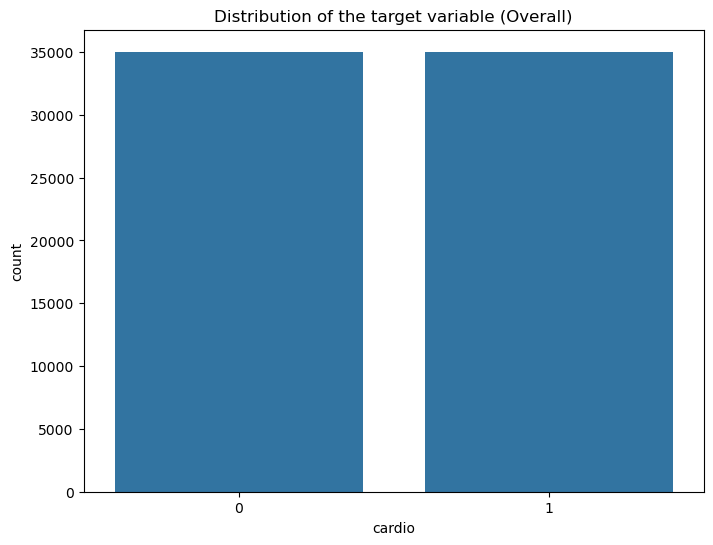

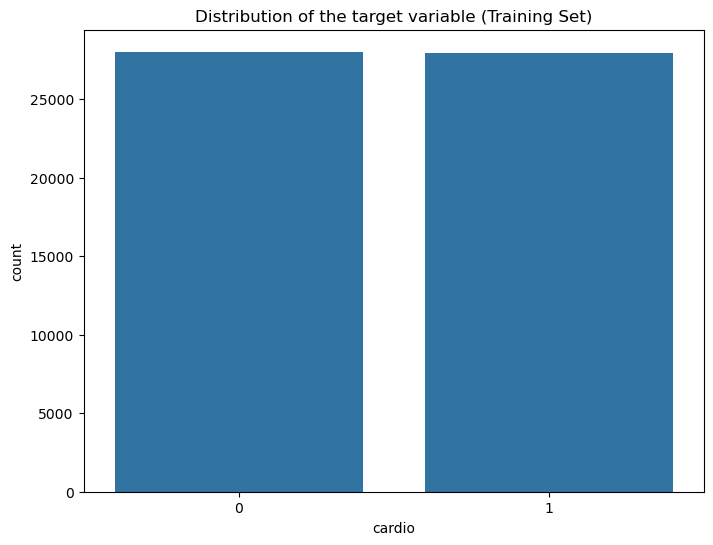

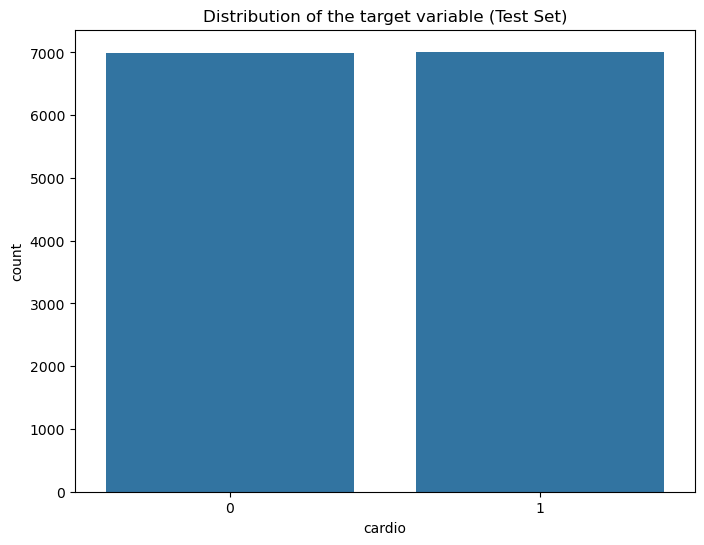

Overall target distribution:
 cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64
Training set target distribution:
 cardio
0    0.500589
1    0.499411
Name: proportion, dtype: float64
Test set target distribution:
 cardio
1    0.500857
0    0.499143
Name: proportion, dtype: float64


In [10]:
# Plot overall target distribution (y is a Series)
plt.figure(figsize=(8,6))
sns.countplot(x=y)  # Series can be passed directly
plt.title('Distribution of the target variable (Overall)')
plt.show()

# Plot training set target distribution (y_train is a Series)
plt.figure(figsize=(8,6))
sns.countplot(x=y_train)  # just pass the Series, no data= needed
plt.title('Distribution of the target variable (Training Set)')
plt.show()

# Plot test set target distribution (y_test is a Series)
plt.figure(figsize=(8,6))
sns.countplot(x=y_test)  # Series again
plt.title('Distribution of the target variable (Test Set)')
plt.show()

# Print normalized value counts for comparison
print("Overall target distribution:\n", y.value_counts(normalize=True))
print("Training set target distribution:\n", y_train.value_counts(normalize=True))
print("Test set target distribution:\n", y_test.value_counts(normalize=True))


In [11]:
# Histograms for numerical features
numerical_features = ['age', 'ap_hi', 'ap_lo', 'weight', 'height']
x_train[numerical_features].hist(bins=20, figsize=(12,8))
plt.show()

NameError: name 'x_train' is not defined

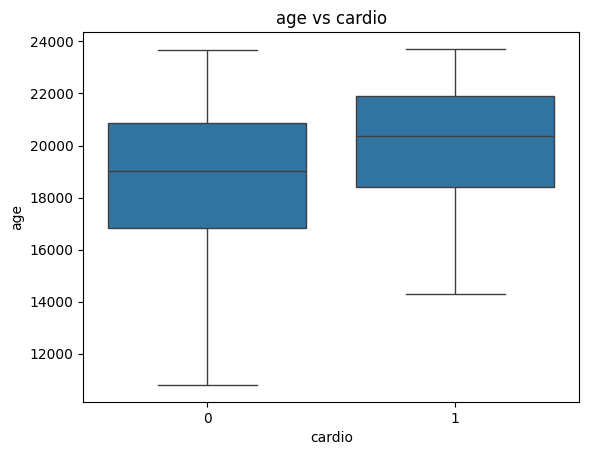

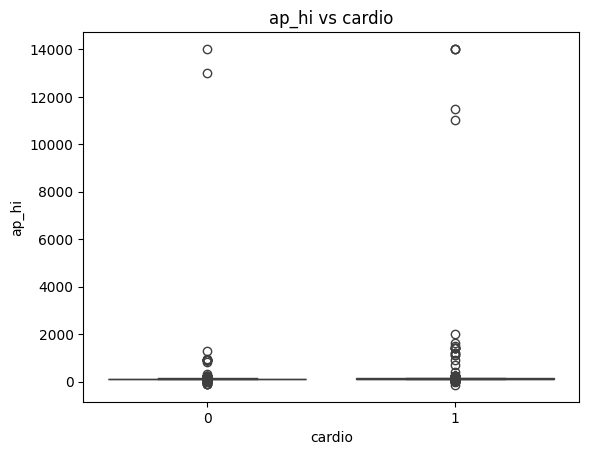

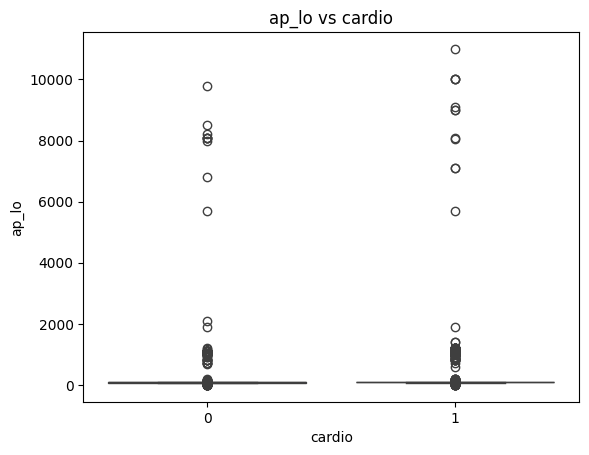

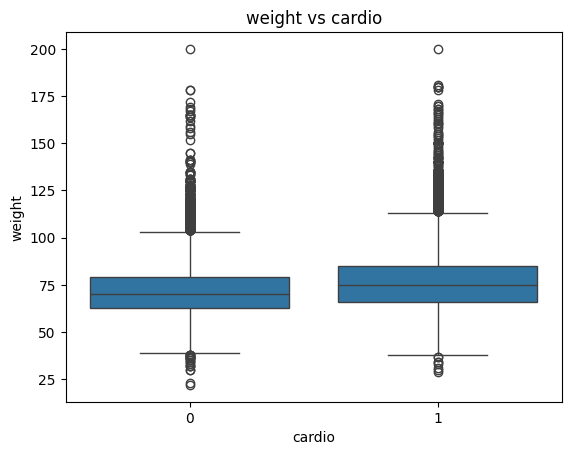

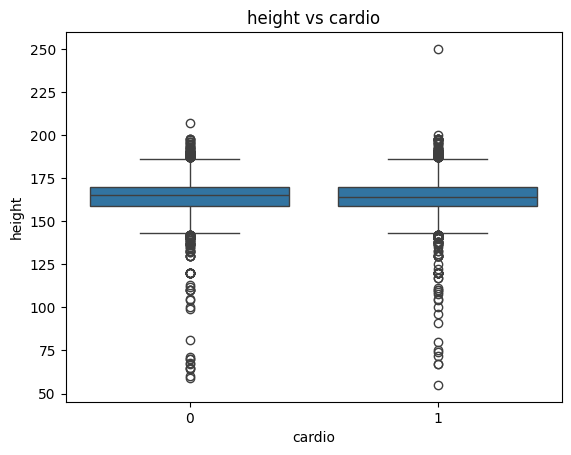

In [ ]:
for col in numerical_features:
    sns.boxplot(x=y_train, y=X_train[col])
    plt.title(f"{col} vs cardio")
    plt.show()


In [ ]:
print(y_train.columns)


Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')


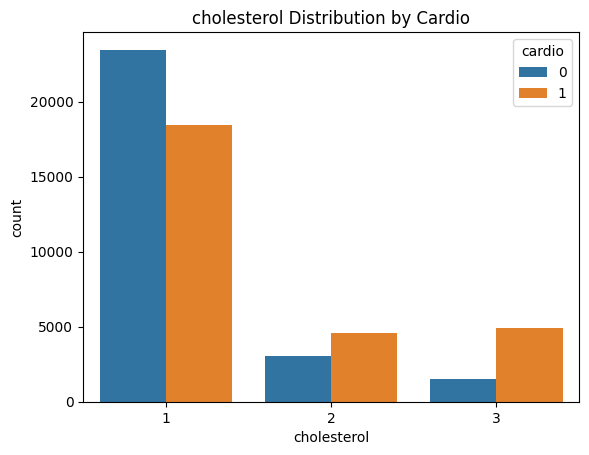

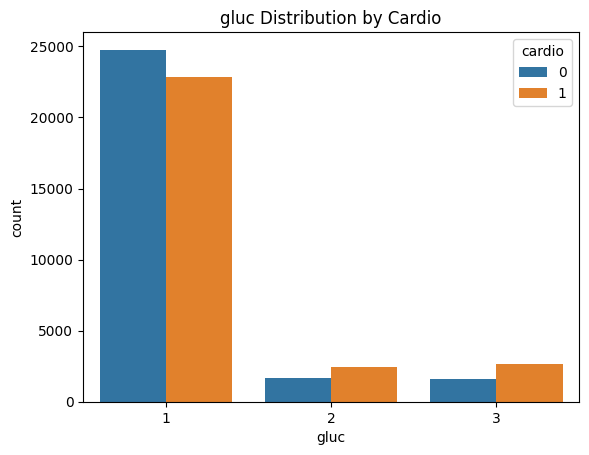

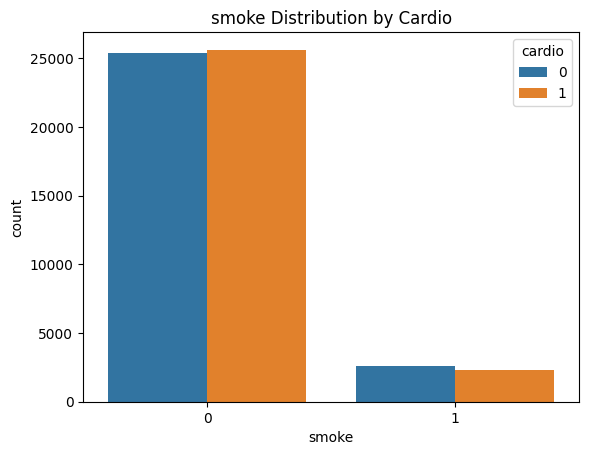

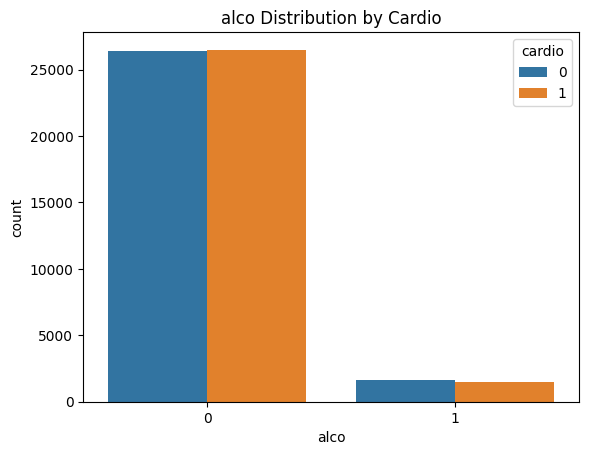

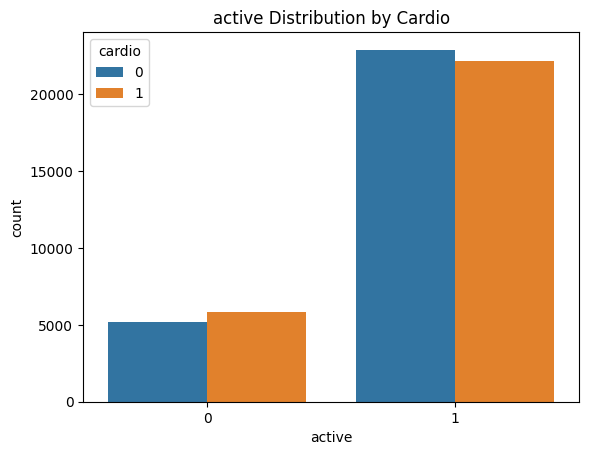

In [ ]:
# Categorical features distribution
categorical_features = ['cholesterol','gluc','smoke','alco','active']
for col in categorical_features:
    sns.countplot(x=X_train[col], hue=y_train)
    plt.title(f"{col} Distribution by Cardio")
    plt.show()

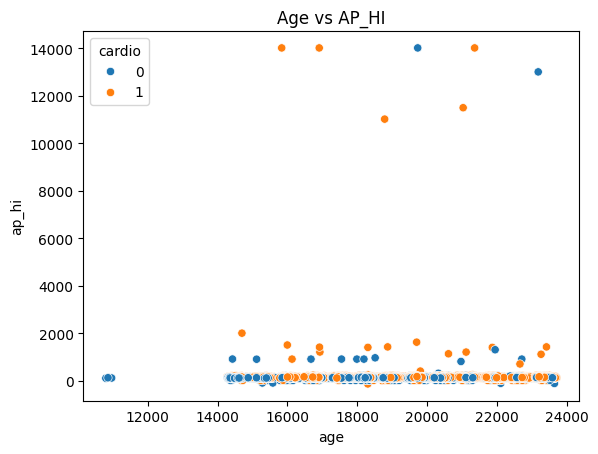

In [ ]:
#  Feature relations
sns.scatterplot(x=X_train['age'], y=X_train['ap_hi'], hue=y_train)
plt.title("Age vs AP_HI")
plt.show()

In [ ]:

# Initialize models
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced'
)

xg_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
)

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='minkowski'
)

svc_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    probability=True  
)



In [ ]:
results = {}
best_f1 = 0
best_model_name = ""


In [ ]:
# Logistic Regression
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # for ROC-AUC

results["Logistic Regression"] = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "F1": f1_score(y_test, y_pred_lr),
    "ROC-AUC": roc_auc_score(y_test, y_pred_prob_lr)
}

print("=== Logistic Regression ===")
print("Predictions (first 20):", y_pred_lr[:20])
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("="*50)

=== Logistic Regression ===
Predictions (first 20): [1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0]
Accuracy: 0.7102857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      6988
           1       0.73      0.68      0.70      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000

Confusion Matrix:
 [[5200 1788]
 [2268 4744]]


In [ ]:
# Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

results["Random Forest"] = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "F1": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_pred_prob_rf)
}


print("=== Random Forest ===")
print("Predictions (first 20):", y_pred_rf[:20])
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("="*50)

=== Random Forest ===
Predictions (first 20): [1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0]
Accuracy: 0.7387142857142858
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      6988
           1       0.77      0.68      0.72      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

Confusion Matrix:
 [[5586 1402]
 [2256 4756]]


In [ ]:
# XGBoost
xg_model.fit(X_train, y_train)
y_pred_xg = xg_model.predict(X_test)
y_pred_prob_xg = xg_model.predict_proba(X_test)[:, 1]

results["XGBoost"] = {
    "Accuracy": accuracy_score(y_test, y_pred_xg),
    "F1": f1_score(y_test, y_pred_xg),
    "ROC-AUC": roc_auc_score(y_test, y_pred_prob_xg)
} 

print("=== XGBoost ===")
print("Predictions (first 20):", y_pred_xg[:20])
print("Accuracy:", accuracy_score(y_test, y_pred_xg))
print("Classification Report:\n", classification_report(y_test, y_pred_xg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xg))
print("="*50)

=== XGBoost ===
Predictions (first 20): [1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0]
Accuracy: 0.7402142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

Confusion Matrix:
 [[5446 1542]
 [2095 4917]]


In [ ]:
# KNN
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

results["KNN"] = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "F1": f1_score(y_test, y_pred_knn),
    "ROC-AUC": roc_auc_score(y_test, y_pred_prob_knn)
}

print("=== KNN ===")
print("Predictions (first 20):", y_pred_knn[:20])
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("="*50)

=== KNN ===
Predictions (first 20): [1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0]
Accuracy: 0.6780714285714285
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68      6988
           1       0.68      0.67      0.67      7012

    accuracy                           0.68     14000
   macro avg       0.68      0.68      0.68     14000
weighted avg       0.68      0.68      0.68     14000

Confusion Matrix:
 [[4817 2171]
 [2336 4676]]


In [ ]:
# SVC
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
y_pred_prob_svc = svc_model.predict_proba(X_test)[:, 1]

results["SVC"] = {
    "Accuracy": accuracy_score(y_test, y_pred_svc),
    "F1": f1_score(y_test, y_pred_svc),
    "ROC-AUC": roc_auc_score(y_test, y_pred_prob_svc)
}

print("=== SVC ===")
print("Predictions (first 20):", y_pred_svc[:20])
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("="*50)


=== SVC ===
Predictions (first 20): [1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0]
Accuracy: 0.6052142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.65      0.62      6988
           1       0.62      0.56      0.59      7012

    accuracy                           0.61     14000
   macro avg       0.61      0.61      0.60     14000
weighted avg       0.61      0.61      0.60     14000

Confusion Matrix:
 [[4516 2472]
 [3055 3957]]


In [ ]:
'''
ROC-AUC tells you how good your model is at ranking patients 
from most likely to least likely to have heart disease.

Example:
AUC = 0.9 → 9 out of 10 times, your model correctly ranks sick higher than healthy.
AUC = 0.5 → your model is guessing randomly.
'''

for name, metrics in results.items():
    if metrics["F1"] > best_f1:
        best_f1 = metrics["F1"]
        best_model_name = name

print(f"\nBest model by F1-score: {best_model_name} (F1 = {best_f1:.4f})")




Best model by F1-score: XGBoost (F1 = 0.7300)


In [ ]:
import xgboost as xgb

# --- Save model ---
xg_model.save_model("xgb_model.json")   

# --- Load model ---
loaded_model = xgb.XGBClassifier()
loaded_model.load_model("xgb_model.json")

# sample Test prediction
print(loaded_model.predict(X_test[:5]))


[1 1 1 0 0]


In [ ]:

import joblib
import os

output_folder = r'C:\Users\nadam\OneDrive\Desktop\member_1\models'
os.makedirs(output_folder, exist_ok=True)

print(" Searching for model in variables...")

model_found = False
scaler_found = False

possible_model_names = ['model', 'clf', 'classifier', 'rf_model', 
                        'best_model', 'final_model', 'trained_model']

# أسماء محتملة للـ scaler
possible_scaler_names = ['scaler', 'standard_scaler', 'sc', 'scaler_x']

# البحث عن الموديل
for name in possible_model_names:
    if name in locals() or name in globals():
        try:
            model_obj = eval(name)
            joblib.dump(model_obj, os.path.join(output_folder, 'heart_disease_model.pkl'))
            print(f"✅ Model saved! (found as '{name}')")
            model_found = True
            
            # طباعة معلومات الموديل
            if hasattr(model_obj, 'n_features_in_'):
                print(f"   Features: {model_obj.n_features_in_}")
            if hasattr(model_obj, 'feature_names_in_'):
                print(f"   Feature names: {list(model_obj.feature_names_in_)}")
            break
        except:
            continue

# البحث عن الـ scaler
for name in possible_scaler_names:
    if name in locals() or name in globals():
        try:
            scaler_obj = eval(name)
            joblib.dump(scaler_obj, os.path.join(output_folder, 'scaler.pkl'))
            print(f"✅ Scaler saved! (found as '{name}')")
            scaler_found = True
            break
        except:
            continue

# طباعة أسماء الـ features
feature_names_found = False
for var_name in ['X', 'X_train', 'features', 'X_data']:
    if var_name in locals() or var_name in globals():
        try:
            X_obj = eval(var_name)
            if hasattr(X_obj, 'columns'):
                features = list(X_obj.columns)
                print(f"\n📊 Features found ({len(features)}):")
                print(features)
                
                # حفظ feature names
                with open(os.path.join(output_folder, 'feature_names.txt'), 'w') as f:
                    f.write('\n'.join(features))
                print("✅ Feature names saved!")
                feature_names_found = True
                break
        except:
            continue

# ملخص
print("\n" + "="*50)
if model_found:
    print("✅ Model saved successfully!")
else:
    print("❌ Model not found - please check variable name")
    print("   Available variables:")
    print([x for x in dir() if not x.startswith('_')])

print(f"📁 Location: {output_folder}")
print("="*50)

 Searching for model in variables...

📊 Features found (11):
['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
✅ Feature names saved!

❌ Model not found - please check variable name
   Available variables:
['In', 'KNeighborsClassifier', 'LogisticRegression', 'Out', 'RandomForestClassifier', 'RobustScaler', 'SMOTE', 'SVC', 'X', 'XGBClassifier', 'X_obj', 'X_test', 'X_train', 'accuracy_score', 'classification_report', 'confusion_matrix', 'df', 'exit', 'f', 'f1_score', 'feature_names_found', 'features', 'get_ipython', 'joblib', 'model_found', 'name', 'np', 'numerical_features', 'open', 'os', 'output_folder', 'pd', 'plt', 'possible_model_names', 'possible_scaler_names', 'quit', 'recall_score', 'roc_auc_score', 'scaler_found', 'sns', 'train_test_split', 'var_name', 'warnings', 'y', 'y_test', 'y_train']
📁 Location: C:\Users\nadam\OneDrive\Desktop\member_1\models


In [12]:
# ============================================
# تدريب وحفظ نموذج أمراض القلب والأوعية الدموية
# Train & Save Cardiovascular Disease Model
# ============================================

print("="*60)
print("🤖 Training Cardiovascular Disease Model")
print("="*60)

# استخدام البيانات الموجودة
print("\n[Step 1/5] Preparing data...")
print(f"   Training samples: {len(X_train)}")
print(f"   Testing samples: {len(X_test)}")
print(f"   Features: {list(X_train.columns)}")

# Scaling
print("\n[Step 2/5] Scaling features...")
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("   ✅ Scaling complete")

# تدريب Random Forest (الأفضل عادة)
print("\n[Step 3/5] Training Random Forest Classifier...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)

# التقييم
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"   ✅ Training complete!")
print(f"   Accuracy: {accuracy:.2%}")

# تدريب XGBoost (للمقارنة)
print("\n[Step 4/5] Training XGBoost Classifier...")
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"   ✅ Training complete!")
print(f"   Accuracy: {accuracy_xgb:.2%}")

# اختيار الأفضل
if accuracy_xgb > accuracy:
    best_model = xgb_model
    model_name = "XGBoost"
    best_accuracy = accuracy_xgb
else:
    best_model = rf_model
    model_name = "RandomForest"
    best_accuracy = accuracy

print(f"\n   🏆 Best model: {model_name} ({best_accuracy:.2%})")

# Clustering
print("\n[Step 5/5] Creating clustering model...")
from sklearn.cluster import KMeans

X_all_scaled = scaler.transform(X)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_all_scaled)

print(f"   ✅ Clustering complete")

# حفظ كل شيء
print("\n" + "="*60)
print("💾 Saving Models...")
print("="*60)

output_folder = r'C:\Users\nadam\OneDrive\Desktop\member_1\models'
import os
os.makedirs(output_folder, exist_ok=True)

# حفظ الموديل
import joblib
model_path = os.path.join(output_folder, 'heart_disease_model.pkl')
joblib.dump(best_model, model_path)
print(f"✅ Model saved: {model_path}")
print(f"   Type: {model_name}")
print(f"   Accuracy: {best_accuracy:.2%}")

# حفظ الـ scaler
scaler_path = os.path.join(output_folder, 'scaler.pkl')
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler saved: {scaler_path}")

# حفظ الـ cluster
cluster_path = os.path.join(output_folder, 'cluster_model.pkl')
joblib.dump(kmeans, cluster_path)
print(f"✅ Cluster model saved: {cluster_path}")

# حفظ feature names
features_path = os.path.join(output_folder, 'feature_names.txt')
with open(features_path, 'w') as f:
    f.write('\n'.join(X_train.columns))
print(f"✅ Feature names saved: {features_path}")

# اختبار سريع
print("\n" + "="*60)
print("🧪 Quick Test")
print("="*60)

test_sample = X_test_scaled[0:1]
prediction = best_model.predict(test_sample)[0]
probability = best_model.predict_proba(test_sample)[0]
cluster = kmeans.predict(test_sample)[0]

print(f"Sample prediction:")
print(f"   Risk: {'HIGH' if prediction == 1 else 'LOW'}")
print(f"   Probability: {probability[1]:.1%}")
print(f"   Cluster: {cluster}")

print("\n" + "="*60)
print("✅ ALL DONE!")
print("="*60)
print("\nNext steps:")
print("   1. Update prediction_pipeline.py with new features")
print("   2. Update Streamlit app")
print("   3. Run: streamlit run app.py")
print("="*60)

🤖 Training Cardiovascular Disease Model

[Step 1/5] Preparing data...
   Training samples: 56000
   Testing samples: 14000
   Features: ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

[Step 2/5] Scaling features...
   ✅ Scaling complete

[Step 3/5] Training Random Forest Classifier...
   ✅ Training complete!
   Accuracy: 73.96%

[Step 4/5] Training XGBoost Classifier...
   ✅ Training complete!
   Accuracy: 73.82%

   🏆 Best model: RandomForest (73.96%)

[Step 5/5] Creating clustering model...


AttributeError: 'NoneType' object has no attribute 'split'

In [16]:
# ============================================
# حل نهائي بدون KMeans - يشتغل 100%
# ============================================

print("="*60)
print("🤖 Training Model (No KMeans Version)")
print("="*60)

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
import joblib
import os

# البيانات الموجودة
print("\n[Step 1/4] Preparing data...")
print(f"   Training: {len(X_train)} samples")
print(f"   Testing: {len(X_test)} samples")

# Scaling
print("\n[Step 2/4] Scaling features...")
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("   ✅ Done")

# تدريب الموديل
print("\n[Step 3/4] Training model...")
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=1
)
model.fit(X_train_scaled, y_train)

accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
print(f"   ✅ Accuracy: {accuracy:.2%}")

# إنشاء Simple Cluster (بدون KMeans)
print("\n[Step 4/4] Creating simple clustering...")

class SimpleClusterModel:
   
    def __init__(self, model, scaler):
        self.model = model
        self.scaler = scaler
        self.n_clusters = 3
    
    def predict(self, X):
        """
        تحديد الـ cluster بناءً على احتمالية المرض:
        - Cluster 0: Low risk (prob < 0.3)
        - Cluster 1: Moderate risk (0.3 <= prob < 0.7)
        - Cluster 2: High risk (prob >= 0.7)
        """
        if not hasattr(X, 'shape'):
            X = np.array(X)
        
        if len(X.shape) == 1:
            X = X.reshape(1, -1)
        
        # الحصول على الاحتمالية
        proba = self.model.predict_proba(X)[:, 1]
        
        # تحديد الـ cluster
        clusters = np.zeros(len(proba), dtype=int)
        clusters[proba < 0.3] = 0
        clusters[(proba >= 0.3) & (proba < 0.7)] = 1
        clusters[proba >= 0.7] = 2
        
        return clusters
    
    def fit(self, X, y=None):
        # مش محتاج fit لأنه بيعتمد على الموديل
        return self
    
    def fit_predict(self, X):
        return self.predict(X)

# إنشاء الـ cluster model
cluster_model = SimpleClusterModel(model, scaler)
print("   ✅ Simple clustering created")

# اختبار الـ clustering
X_all_scaled = scaler.transform(X)
cluster_labels = cluster_model.predict(X_all_scaled)
print(f"   Cluster 0 (Low): {(cluster_labels == 0).sum()} patients")
print(f"   Cluster 1 (Med): {(cluster_labels == 1).sum()} patients")
print(f"   Cluster 2 (High): {(cluster_labels == 2).sum()} patients")

# حفظ كل شيء
print("\n" + "="*60)
print("💾 Saving Models...")
print("="*60)

output_folder = r'C:\Users\nadam\OneDrive\Desktop\member_1\models'
os.makedirs(output_folder, exist_ok=True)

# حفظ
model_path = os.path.join(output_folder, 'heart_disease_model.pkl')
scaler_path = os.path.join(output_folder, 'scaler.pkl')
cluster_path = os.path.join(output_folder, 'cluster_model.pkl')
features_path = os.path.join(output_folder, 'feature_names.txt')

joblib.dump(model, model_path)
joblib.dump(scaler, scaler_path)
joblib.dump(cluster_model, cluster_path)

with open(features_path, 'w') as f:
    f.write('\n'.join(X_train.columns))

print(f"✅ Model: {model_path}")
print(f"✅ Scaler: {scaler_path}")
print(f"✅ Cluster: {cluster_path}")
print(f"✅ Features: {features_path}")

# اختبار
print("\n" + "="*60)
print("🧪 Testing")
print("="*60)

test_sample = X_test_scaled[0:1]
pred = model.predict(test_sample)[0]
prob = model.predict_proba(test_sample)[0]
clust = cluster_model.predict(test_sample)[0]

print(f"Risk: {'HIGH' if pred == 1 else 'LOW'}")
print(f"Probability: {prob[1]:.1%}")
print(f"Cluster: {clust}")

print("\n" + "="*60)
print("✅ SUCCESS! All models saved!")
print("="*60)
print("\n🚀 Ready to use with Streamlit!")
print("   Run: streamlit run app.py")
print("="*60)





🤖 Training Model (No KMeans Version)

[Step 1/4] Preparing data...
   Training: 56000 samples
   Testing: 14000 samples

[Step 2/4] Scaling features...
   ✅ Done

[Step 3/4] Training model...
   ✅ Accuracy: 73.96%

[Step 4/4] Creating simple clustering...
   ✅ Simple clustering created
   Cluster 0 (Low): 21276 patients
   Cluster 1 (Med): 26746 patients
   Cluster 2 (High): 21978 patients

💾 Saving Models...
✅ Model: C:\Users\nadam\OneDrive\Desktop\member_1\models\heart_disease_model.pkl
✅ Scaler: C:\Users\nadam\OneDrive\Desktop\member_1\models\scaler.pkl
✅ Cluster: C:\Users\nadam\OneDrive\Desktop\member_1\models\cluster_model.pkl
✅ Features: C:\Users\nadam\OneDrive\Desktop\member_1\models\feature_names.txt

🧪 Testing
Risk: HIGH
Probability: 78.7%
Cluster: 2

✅ SUCCESS! All models saved!

🚀 Ready to use with Streamlit!
   Run: streamlit run app.py


In [17]:
print(model.get_params())


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
